# Deep Learning with the Keras Library

**Goals:**

- Learn how to **construct** and train a keras model on both classification and regression data.

- Specifically this means, configuring model archectiture, compiling the algorithm, and fitting/predicting.

- How to implement machine learning techniques that we know but in Keras (train/test split, cross validation)

- We'll be using Keras on the front-end and TensorFlow on the backend, meaning we'll write code with Keras but the algorithms will be powered by TensorFlow.

## Keras

In [180]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_moons, make_regression

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical


You should see a message that says "Using TensorFlow Backend."

If not, follow these instructions, but only after you've installed TensorFlow.

Navigate to this directory in your terminal: `~/.keras/'`

Type: `ls`

You should see the following: `datasets	keras.json`

We're going to edit the keras.json file using command line. Type: `nano keras.json`

In the dictionary, change the value for the key "backend" to "tensorflow".

Once you're finsihed, save/exit by following the instructions.

If you haven't installed Keras and TensorFlow.
- Mac: https://www.pyimagesearch.com/2016/11/14/installing-keras-with-tensorflow-backend/

- PC: https://www.lynda.com/Google-TensorFlow-tutorials/Installing-Keras-TensorFlow-backend-Windows/601801/642176-4.html

If it's not working, don't worry! Not a big deal, either find a tutorial online (stackoverflow) or ask me.

## Classification Deep Learning

We're going to use the keras library to the fake moons dataset from sklearn

In [84]:
#Generate data
X, y = make_moons(n_samples=3000,
                    noise=0.12,
                    random_state=0)

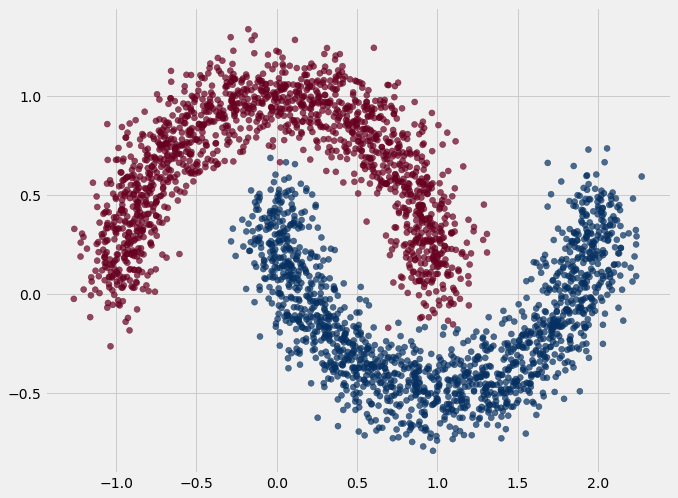

In [85]:
#Visualize data

plt.style.use("fivethirtyeight")
plt.figure(figsize = (10, 8))

plt.scatter(X[:, 0], X[:, 1], c= y, alpha = 0.7, cmap = "RdBu");

0 is red, 1 is blue

Before we make our keras model, how well would the following models work with this data: Logistic Regression, Decision Trees, and K-Nearest Neighbors

Time to design the model.

Setting up a Keras model takes more work than your a Sklearn model.

In [137]:
#Intialization with Sequential

model = Sequential()

Adding an input layer to our model using the Dense function

In [138]:
#Specify number of features in data
n_cols = X.shape[1]

#Adding layer with 10 units, activation function set to relu

model.add(Dense(10, activation="relu", input_shape=(n_cols,)))

Add an output layer, the number of units must be equal to number of unique values in target variable, which in this case is 2. Use the sigmoid activation function

In [139]:
# Add the output layer
#Assign number of uniques to n_unique
n_unique = len(pd.unique(y))
model.add(Dense(n_unique, activation= "sigmoid"))


Here we compile the model, which means setting the optimization, loss, and metric paramaters

In [140]:
#Set optimzer to Stochastic Gradient Descent, loss to categorical_crossentropy, metrics = accuracy
model.compile(optimizer="sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

Before fitting, we have to binarize the target variable

In [141]:
y_binary = to_categorical(y)
y_binary

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [142]:
#Null accuracy
pd.value_counts(y, normalize=True)

1    0.5
0    0.5
dtype: float64

Fitting time! Call .fit() like you would a sklearn model.

In [143]:

model.fit(X, y_binary)

Epoch 1/10
3000/3000 [==============================] - 0s - loss: 0.7755 - acc: 0.5290     
Epoch 2/10
3000/3000 [==============================] - 0s - loss: 0.6867 - acc: 0.6103     
Epoch 3/10
3000/3000 [==============================] - 0s - loss: 0.6353 - acc: 0.6983     
Epoch 4/10
3000/3000 [==============================] - 0s - loss: 0.5910 - acc: 0.7740     
Epoch 5/10
3000/3000 [==============================] - 0s - loss: 0.5461 - acc: 0.8097     
Epoch 6/10
3000/3000 [==============================] - 0s - loss: 0.4982 - acc: 0.8430     
Epoch 7/10
3000/3000 [==============================] - 0s - loss: 0.4513 - acc: 0.8517     
Epoch 8/10
3000/3000 [==============================] - 0s - loss: 0.4110 - acc: 0.8503     
Epoch 9/10
3000/3000 [==============================] - 0s - loss: 0.3797 - acc: 0.8497     
Epoch 10/10
3000/3000 [==============================] - 0s - loss: 0.3562 - acc: 0.8510     


## **CONGRATS ON MAKING YOUR FIRST DEEP LEARNING MODEL**

[Epoch defintion](https://deeplearning4j.org/glossary): "In machine-learning parlance, an epoch is a complete pass through a given dataset. That is, by the end of one epoch, your neural network will have been exposed to every record to example within the dataset once"

<br>

Epochs are another parameter that you have to configure and can have an effect on your model's performance.

Model tells use the log loss and accuracy scores for each epoch. Do you notice any trends in these scores for each epoch?

**Visualization time.** Like we did for previous, we're going to visualize the decision boundaries of this one layer neural net model. 

In [81]:
#Load in the plot_decision_boundary function
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40,cmap="RdBu", alpha=0.4)
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

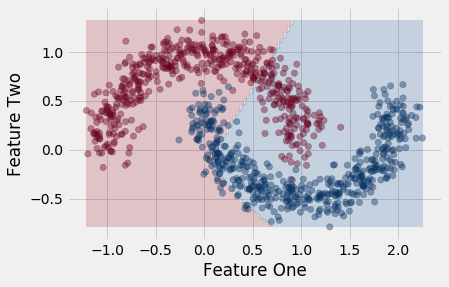

In [83]:
#Use decision boundary function model and the data
plot_decision_boundary(model, X, y)

Thoughts on the results? How good is the model?

Make prediction on point (0,0). Works same way as sklearn.

In [134]:
point = np.array([[0, 0]])

model.predict(point)

array([[ 0.55509698,  0.45050547]], dtype=float32)

Instead of outputting a 0 or 1, it gives the probabilites of the of both unique values.

<br>

`.predict_classes()` is predicting the class not probability

In [144]:
model.predict_classes(point)

1/1 [==============================] - 0s


array([1])

This is a very simple model, it only has one shallow layer. Let's add some more layers.

In [93]:
#Intialize
model = Sequential()

# Add the first layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(100, activation='relu'))


# Add the output layer with softmax activation function
model.add(Dense(2, activation = "softmax"))

#Use adam optimizer
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [94]:
#Fit model with 30 epochs
model.fit(X, y_binary, epochs=30)

Epoch 1/30
3000/3000 [==============================] - 0s - loss: 0.3450 - acc: 0.8347     
Epoch 2/30
3000/3000 [==============================] - 0s - loss: 0.1954 - acc: 0.9063     
Epoch 3/30
3000/3000 [==============================] - 0s - loss: 0.1194 - acc: 0.9547     
Epoch 4/30
3000/3000 [==============================] - 0s - loss: 0.0642 - acc: 0.9807     
Epoch 5/30
3000/3000 [==============================] - 0s - loss: 0.0345 - acc: 0.9917     
Epoch 6/30
3000/3000 [==============================] - 0s - loss: 0.0211 - acc: 0.9963     
Epoch 7/30
3000/3000 [==============================] - 0s - loss: 0.0151 - acc: 0.9973     
Epoch 8/30
3000/3000 [==============================] - 0s - loss: 0.0122 - acc: 0.9977     
Epoch 9/30
3000/3000 [==============================] - 0s - loss: 0.0118 - acc: 0.9970     
Epoch 10/30
3000/3000 [==============================] - ETA: 0s - loss: 0.0096 - acc: 0.998 - 0s - loss: 0.0091 - acc: 0.9983     
Epoch 11/30
3000/3000 [========

How does the model perform now?

Let's *see* the difference

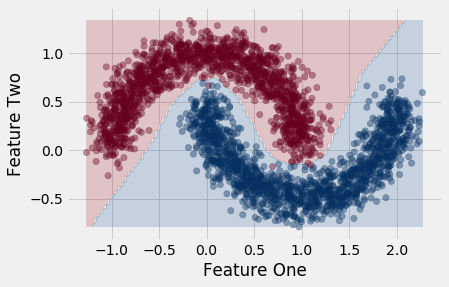

In [95]:
#Use decision boundary function model and the data
plot_decision_boundary(model, X, y)

How does that look to you? Better or worse than before? By how much?

In [96]:
#Look at model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 202       
Total params: 10,602
Trainable params: 10,602
Non-trainable params: 0
_________________________________________________________________


We're trained a really good model, but principles of cross validation also to deep learning. Here's how we'll evaluate the model on a testing data.

In [97]:
#The same code for fitting a model as we used before but this time set validation_split to 0.25
model.fit(X, y_binary, epochs=40, validation_split = 0.25)

Train on 2250 samples, validate on 750 samples
Epoch 1/40
2250/2250 [==============================] - 0s - loss: 0.0058 - acc: 0.9978 - val_loss: 0.0068 - val_acc: 0.9973
Epoch 2/40
2250/2250 [==============================] - 0s - loss: 0.0045 - acc: 0.9987 - val_loss: 0.0036 - val_acc: 0.9987
Epoch 3/40
2250/2250 [==============================] - 0s - loss: 0.0051 - acc: 0.9982 - val_loss: 0.0084 - val_acc: 0.9987
Epoch 4/40
2250/2250 [==============================] - 0s - loss: 0.0049 - acc: 0.9987 - val_loss: 0.0085 - val_acc: 0.9973
Epoch 5/40
2250/2250 [==============================] - 0s - loss: 0.0052 - acc: 0.9978 - val_loss: 0.0125 - val_acc: 0.9960
Epoch 6/40
2250/2250 [==============================] - 0s - loss: 0.0050 - acc: 0.9973 - val_loss: 0.0139 - val_acc: 0.9947
Epoch 7/40
2250/2250 [==============================] - 0s - loss: 0.0049 - acc: 0.9982 - val_loss: 0.0062 - val_acc: 0.9987
Epoch 8/40
2250/2250 [==============================] - 0s - loss: 0.0040 - ac

Whats your assessment of the model now? Does it overfit?

## Regression Deep Learning

Now let's train a neural net on a regression dataset

In [118]:
#Make regression data
Xr, yr = make_regression(n_samples=1000, n_features=1, noise=7, random_state=4,bias = 0.7)

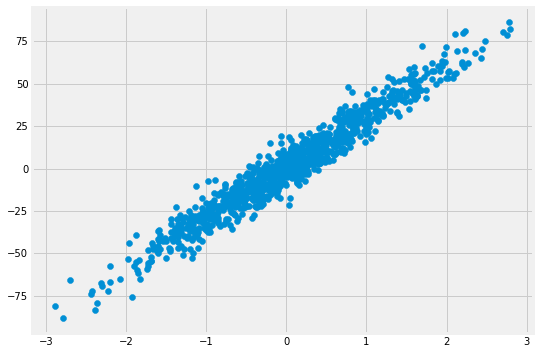

In [120]:
#Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Xr, yr);

In [146]:
n_cols = Xr.shape[1]

#Intialize
model = Sequential()

# Add the first and only layer with 20 units and relu activation function
model.add(Dense(20, activation='relu', input_shape=(n_cols,)))


# Add the output layer with one unit. In regression, the output layer only has one unit.
model.add(Dense(1))


Compiler

In [147]:
#Use adam as optimizer function and set lose to mean_squared_error
model.compile(optimizer="adam", loss = "mean_squared_error")

In [148]:
#Fit model with 20 epochs
model.fit(Xr, yr, epochs = 20)

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 860.8132     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 847.3721     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 834.1849     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 820.6317     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 806.3305     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 791.7294     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 775.8619     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 759.3833     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 741.5592     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 723.0435     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 703.3944     
Epoch 12/20
1000/1000 [==============================] - 0s - loss: 682.9210     
Epoch 13/20
1000/1000 [==

Let's try it again but with train test split

In [149]:
model.fit(Xr, yr, epochs = 20, validation_split=.25)

Train on 750 samples, validate on 250 samples
Epoch 1/20
750/750 [==============================] - 0s - loss: 465.5471 - val_loss: 508.7413
Epoch 2/20
750/750 [==============================] - 0s - loss: 448.8682 - val_loss: 491.7935
Epoch 3/20
750/750 [==============================] - 0s - loss: 432.4743 - val_loss: 474.5082
Epoch 4/20
750/750 [==============================] - 0s - loss: 416.5309 - val_loss: 457.3551
Epoch 5/20
750/750 [==============================] - 0s - loss: 400.3657 - val_loss: 441.1719
Epoch 6/20
750/750 [==============================] - 0s - loss: 385.0168 - val_loss: 424.6453
Epoch 7/20
750/750 [==============================] - 0s - loss: 369.6263 - val_loss: 408.8957
Epoch 8/20
750/750 [==============================] - 0s - loss: 354.9551 - val_loss: 392.6486
Epoch 9/20
750/750 [==============================] - 0s - loss: 340.2690 - val_loss: 377.4382
Epoch 10/20
750/750 [==============================] - 0s - loss: 326.5209 - val_loss: 362.5340
Epo

Visualize predictions

In [150]:
#Predictions

preds = model.predict(Xr)
preds

array([[ -7.24236488e+00],
       [  2.15444732e+00],
       [  5.87074089e+00],
       [  4.52372599e+00],
       [ -3.07896652e+01],
       [  1.08194427e+01],
       [ -6.25180781e-01],
       [ -2.13670940e+01],
       [ -4.61420975e+01],
       [ -2.77711010e+01],
       [ -1.02249479e+01],
       [ -8.53919220e+00],
       [ -2.03292713e+01],
       [ -3.44672370e+00],
       [ -2.54872246e+01],
       [ -1.31993828e+01],
       [ -2.49999847e+01],
       [ -4.64336681e+00],
       [ -2.78802681e+01],
       [  1.04794817e+01],
       [ -1.06970549e+00],
       [ -9.86076832e+00],
       [ -1.41753187e+01],
       [ -2.01456261e+01],
       [  1.38658705e+01],
       [  1.79406738e+01],
       [  6.18727589e+00],
       [ -3.70144629e+00],
       [  3.45483613e+00],
       [ -1.55585775e+01],
       [ -2.04723091e+01],
       [ -3.63871765e+01],
       [ -8.80406916e-01],
       [ -2.00845490e+01],
       [  1.51505957e+01],
       [  1.13378592e+01],
       [  2.49675632e+00],
 

In [154]:
#Put predictions into dataframe for sorting purposes

pred_df = pd.DataFrame()

pred_df["feature"] = list(Xr)
pred_df["preds"] = list(preds)

In [155]:
#Sort dataframe

pred_df.sort_values("feature", inplace=True)

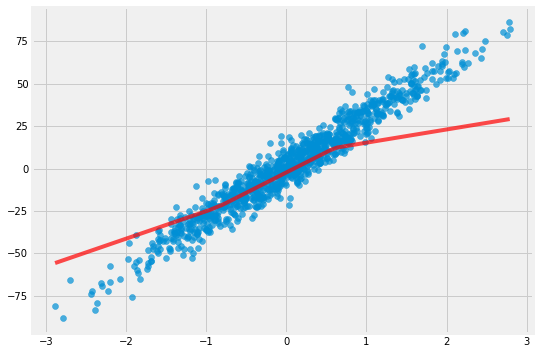

In [156]:
#Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Xr, yr, alpha=.7)
plt.plot(pred_df.feature, pred_df.preds,c = "r",  alpha = 0.7);

How does that look?

**Back to the drawing board!**

We need more layers!!

In [165]:
model = Sequential()

# Add the first layer with 50 units and relu activation function
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer with 32 
model.add(Dense(100, activation='relu'))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer="adam", loss = "mean_squared_error")


In [166]:
#Fit model with 40 epochs
model.fit(Xr, yr, epochs = 40, validation_split=.25)

Train on 750 samples, validate on 250 samples
Epoch 1/40
750/750 [==============================] - 0s - loss: 814.8325 - val_loss: 851.7518
Epoch 2/40
750/750 [==============================] - 0s - loss: 754.3678 - val_loss: 756.8058
Epoch 3/40
750/750 [==============================] - 0s - loss: 631.2371 - val_loss: 578.5638
Epoch 4/40
750/750 [==============================] - 0s - loss: 432.5361 - val_loss: 333.6091
Epoch 5/40
750/750 [==============================] - 0s - loss: 218.4875 - val_loss: 133.9763
Epoch 6/40
750/750 [==============================] - 0s - loss: 93.0881 - val_loss: 76.1661
Epoch 7/40
750/750 [==============================] - 0s - loss: 68.0957 - val_loss: 70.1981
Epoch 8/40
750/750 [==============================] - 0s - loss: 63.4608 - val_loss: 66.6113
Epoch 9/40
750/750 [==============================] - 0s - loss: 61.9633 - val_loss: 66.1726
Epoch 10/40
750/750 [==============================] - 0s - loss: 61.6487 - val_loss: 65.7104
Epoch 11/40
7

In [168]:
#Predictions

preds = model.predict(Xr)
preds

#Put predictions into dataframe for sorting purposes

pred_df = pd.DataFrame()

pred_df["feature"] = list(Xr)
pred_df["preds"] = list(preds)

#Sort dataframe

pred_df.sort_values("feature", inplace=True)

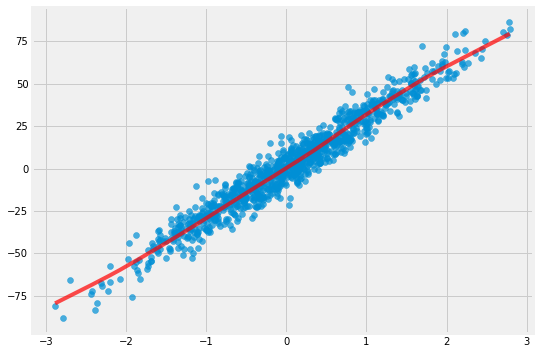

In [169]:
#Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Xr, yr, alpha=.7)
plt.plot(pred_df.feature, pred_df.preds,c = "r",  alpha = 0.7);

How does that look?

In [ ]:
#Prediction
p = np.array([[0]])
model.predict(p)

In [170]:
#Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


Let's visualize the performance over the epochs, but first we have to reset the model.

In [173]:
model = Sequential()

# Add the first layer with 50 units and relu activation function
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer with 32 
model.add(Dense(100, activation='relu'))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer="adam", loss = "mean_squared_error")


In [174]:
#Re fit the model but set verbose to False and use 40 epochs and validation split to .3
#Assign model to m variable
m = model.fit(Xr, yr, epochs=40, validation_split=0.2, verbose=False)

In [175]:
#Call .history on m
m.history

{'loss': [824.20208618164065,
  748.66460693359375,
  605.33501831054684,
  382.29934082031252,
  167.52937454223633,
  79.054116363525395,
  64.451040496826167,
  62.154700927734375,
  61.416187591552735,
  61.310566558837891,
  60.838978118896485,
  59.700902709960936,
  59.474985504150389,
  58.467942352294919,
  57.532712707519529,
  56.603972320556643,
  55.847831115722656,
  54.853868255615232,
  54.161275939941405,
  53.800867614746096,
  52.212653198242187,
  51.526538543701172,
  50.576795654296873,
  50.391030578613282,
  49.585888748168948,
  49.292054443359376,
  48.687937316894534,
  48.321336669921877,
  48.275700378417966,
  47.416246795654295,
  47.234260559082031,
  47.165542678833006,
  47.133691024780276,
  46.720283126831056,
  46.614472808837888,
  47.04176818847656,
  46.647571105957034,
  47.016265106201175,
  46.544589614868165,
  46.569461669921878],
 'val_loss': [773.3928271484375,
  671.46710449218745,
  484.62198242187497,
  253.54295166015626,
  103.8461700

We're going to plot the scores over the course of the epochs

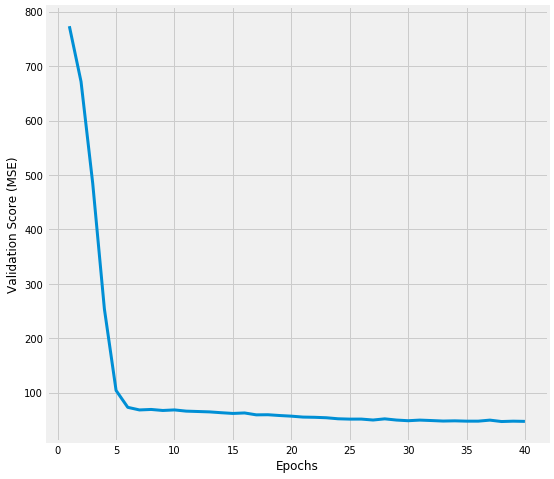

In [179]:
plt.figure(figsize=(8, 8))
epochs = range(1, 41)
plt.plot(epochs, m.history["val_loss"], linewidth =3)
plt.xlabel("Epochs")
plt.ylabel("Validation Score (MSE)");

What relationship do you see here? What does this tell us about our epochs?

**Answer:** We don't really need to the epochs after 15 because it produces diminishing marginal results. Basically, we're wasting our time.

We're going to solve this problem by using a tool called "EarlyStopping"

In [189]:
#Intialize early_stopper object with patience = 1 and min_delta = 1

es = EarlyStopping(patience=1, min_delta=1)

Patience value indicates how many epochs of no improvement until the algorithms stops fitting.

Min_delta value is the model improvement threshold it must meet in order to keep going.

Restart the model from the beginning.

In [192]:
model = Sequential()

# Add the first layer with 50 units and relu activation function
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer with 32 
model.add(Dense(100, activation='relu'))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer="adam", loss = "mean_squared_error")


In [193]:
#Fit model on regresion data, use 40 epochs, validation split of .3
#Set callbacks equal to [es]
model.fit(Xr, yr, epochs=40, validation_split=0.2, callbacks=[es])

Train on 800 samples, validate on 200 samples
Epoch 1/40
800/800 [==============================] - 0s - loss: 826.9807 - val_loss: 773.1452
Epoch 2/40
800/800 [==============================] - 0s - loss: 749.9331 - val_loss: 672.8979
Epoch 3/40
800/800 [==============================] - 0s - loss: 617.5759 - val_loss: 500.3576
Epoch 4/40
800/800 [==============================] - 0s - loss: 415.1586 - val_loss: 281.2024
Epoch 5/40
800/800 [==============================] - 0s - loss: 206.8576 - val_loss: 118.1438
Epoch 6/40
800/800 [==============================] - 0s - loss: 90.6923 - val_loss: 73.0731
Epoch 7/40
800/800 [==============================] - 0s - loss: 66.3891 - val_loss: 70.7186
Epoch 8/40
800/800 [==============================] - 0s - loss: 62.9583 - val_loss: 68.3316
Epoch 9/40
800/800 [==============================] - 0s - loss: 61.6906 - val_loss: 68.4918
Epoch 10/40
800/800 [==============================] - 0s - loss: 61.1179 - val_loss: 67.9144
Epoch 11/40
8

## Bonus

http://playground.tensorflow.org/

# Resources

`from deep_learning_materials import Resources`

`resource = Resources()`

`resource.download()`


# Class Lab Time

1. Make a function that returns a pre-initialized with a two layer Keras model. The choice of parameters are up to you.

2. Pick a supervised learning dataset (regression or classification) and use Keras to model that data. Compare results of the keras model to that of a logistic regression model. You're also more than welcome to use keras on your final project data as well.
